In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Предобработка и разведывательный анализ данных

In [2]:
df = pd.read_csv('Dataset_nikita.csv')

Осмотр датафрейма

In [3]:
df.describe()

,Year,Tax,mileage,config_type,car_brand,price
count,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000
mean,2007.703704,818.185185,146935.460460,1.02002,4.503504,33097.468468
std,8.026777,390.898865,86359.236465,0.81911,2.921782,24270.381201
min,1995.000000,151.000000,1302.000000,0.00000,0.000000,10058.000000
25%,2001.000000,462.500000,71577.500000,0.00000,2.000000,20209.000000
50%,2007.000000,813.000000,143446.000000,1.00000,4.000000,30461.000000
75%,2015.000000,1150.000000,220956.000000,2.00000,7.000000,40682.000000
max,2022.000000,1500.000000,299985.000000,2.00000,9.000000,325587.000000


Попробуем выявить зависимость между маркой машины и ценой

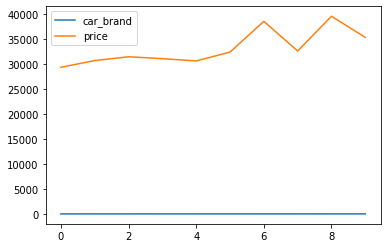

In [4]:
df.groupby('car_brand', as_index=False, dropna=True).agg({'price' : 'mean'}).plot()

Попробуем выявить зависимость между маркой машины, конфигурации и ценой

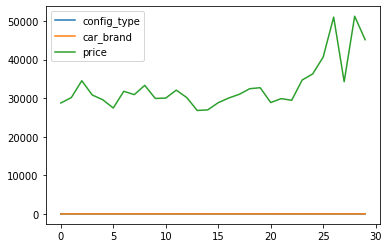

In [5]:
df.groupby(['config_type', 'car_brand'], as_index=False, dropna=False).agg({'price':'mean'}).plot()

In [6]:
import numpy as np
import tensorflow as tf
import random as rn
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras import backend as K
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier

In [7]:
# Import pandas
import pandas as pd
print(df.columns)
data = df
data = data.to_numpy()
print(data)

Index(['Year', 'Tax', 'mileage', 'config_type', 'car_brand', 'price'], dtype='object')
[[1.99500e+03 7.32000e+02 2.46508e+05 2.00000e+00 9.00000e+00 2.85000e+04]
 [2.00400e+03 4.20000e+02 2.42483e+05 2.00000e+00 8.00000e+00 4.56400e+04]
 [2.00000e+03 2.42000e+02 2.44068e+05 1.00000e+00 7.00000e+00 1.99940e+04]
 ...
 [2.01100e+03 1.21600e+03 2.01159e+05 2.00000e+00 5.00000e+00 1.05260e+04]
 [2.00200e+03 6.90000e+02 2.95729e+05 1.00000e+00 5.00000e+00 1.62920e+04]
 [2.00200e+03 1.39600e+03 6.17600e+03 2.00000e+00 3.00000e+00 1.74860e+04]]


In [8]:
Y = data[:, -1]
X = data[:, :-1]

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)#Разбили выборку на обучающий и тестовый наборы
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler = MinMaxScaler().fit(np.expand_dims(Y_train, -1))
print(X_scaler)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

Y_train = Y_scaler.transform(np.expand_dims(Y_train, -1)).ravel()
Y_test = Y_scaler.transform(np.expand_dims(Y_test, -1)).ravel()

MinMaxScaler()


In [10]:
from sklearn.linear_model import Ridge
regr = Ridge()
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred)

0.00372193684892448

In [23]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor()
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred)


0.003306131950593477

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
model = Sequential()
model.add(Dense(32,activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse'])
print(model.summary())

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=25)

In [ ]:
model1 = Sequential()
model1.add(Dense(32,activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(256,activation='relu'))
model1.add(Dense(1))
model1.compile(loss='mse',
              optimizer='adam',
              metrics=['mse'])
print(model1.summary())

In [ ]:
history1 = model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=25)

In [ ]:
mse, mae = model.evaluate(X_test, Y_test, verbose=0)
print(mse)
plt.plot(history.history['mse'], label='')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc='lower right')
model.save('model1.h5')

In [ ]:
mse, mae = model1.evaluate(X_test, Y_test, verbose=0)
print(mse)
plt.plot(history1.history['mse'], label='')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc='lower right')
model1.save('model2.h5')

In [19]:
prediction = model.predict(X_test)
pred_vals = Y_scaler.inverse_transform(prediction)
true_vals = Y_scaler.inverse_transform(Y_test.reshape(-1, 1))
stacked = np.hstack((pred_vals, true_vals))
stacked[:10]

array([[23226.3203125 , 21033.        ],
       [29808.50390625, 25915.        ],
       [21934.15234375, 23426.        ],
       [26693.7734375 , 10699.        ],
       [30672.16796875, 17822.        ],
       [32229.06640625, 24871.        ],
       [30521.44335938, 23616.        ],
       [31379.41210938, 22617.        ],
       [28543.85742188, 20199.        ],
       [23115.6953125 , 25625.        ]])

In [20]:
prediction_1 = model1.predict(X_test)
pred_vals = Y_scaler.inverse_transform(prediction_1)
true_vals = Y_scaler.inverse_transform(Y_test.reshape(-1, 1))
stacked = np.hstack((pred_vals, true_vals))
stacked[:10]

array([[28963.12890625, 21033.        ],
       [32299.56835938, 25915.        ],
       [26894.11914062, 23426.        ],
       [27236.640625  , 10699.        ],
       [37194.0546875 , 17822.        ],
       [26498.3046875 , 24871.        ],
       [20051.93554688, 23616.        ],
       [24879.3515625 , 22617.        ],
       [37787.72265625, 20199.        ],
       [ 9061.81835938, 25625.        ]])